In [1]:
import tensorflow
print(tensorflow.__version__)

2.12.0-rc1


# Importing Libraries

In [2]:
import cv2
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# Data Preprocessing

In [3]:
data_path='dataset1/'

categories=os.listdir(data_path)

labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'normal': 0, 'potholes': 1}
['normal', 'potholes']
[0, 1]


# Feature Extraction

In [4]:
img_size=256
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

Exception: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



In [5]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)
from keras.utils import np_utils
new_label=np_utils.to_categorical(label)

# Splitting data into traning and testing

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.2)

# Displaying 20 images after pre-processing

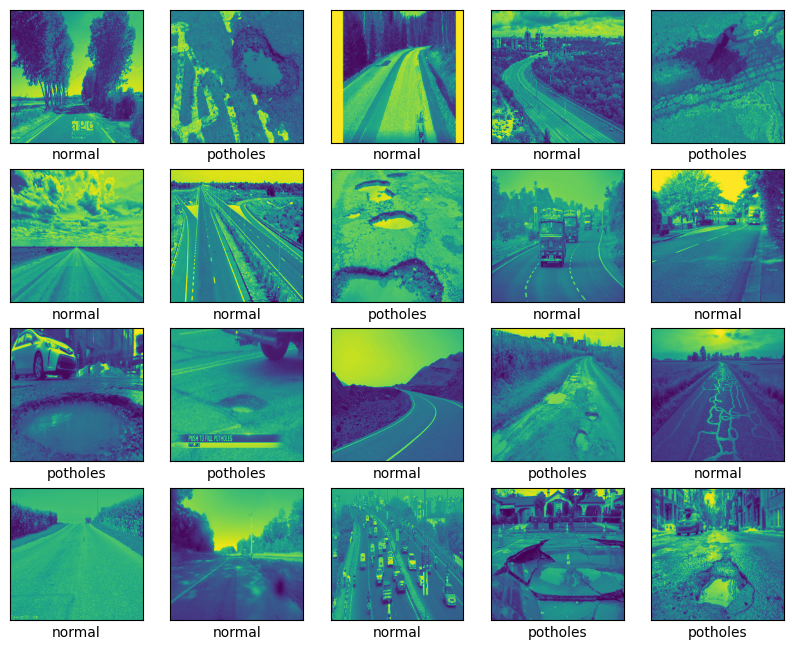

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

# Random Forest Algorithm

In [8]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

rf = RandomForestClassifier(n_estimators=80, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=80, random_state=42)

In [9]:
from sklearn.metrics import accuracy_score
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7241379310344828


# Evaluation

<Figure size 640x480 with 0 Axes>

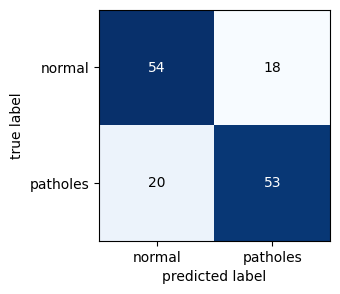

In [10]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

test_labels = np.argmax(y_test, axis=1)
predictions = rf.predict(x_test)
predictions = np.argmax(predictions, axis=-1)


cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['normal','patholes'], fontsize=10)
plt.yticks(range(2), ['normal','patholes'], fontsize=10)
plt.show()

In [11]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

report = classification_report(test_labels, predictions, target_names=categories)
print(report)

              precision    recall  f1-score   support

      normal       0.73      0.75      0.74        72
    potholes       0.75      0.73      0.74        73

    accuracy                           0.74       145
   macro avg       0.74      0.74      0.74       145
weighted avg       0.74      0.74      0.74       145



# Visualization

n_estimators: 10, accuracy: 0.593103448275862
n_estimators: 20, accuracy: 0.6482758620689655
n_estimators: 30, accuracy: 0.6620689655172414
n_estimators: 40, accuracy: 0.6620689655172414
n_estimators: 50, accuracy: 0.6758620689655173
n_estimators: 60, accuracy: 0.7241379310344828
n_estimators: 70, accuracy: 0.7310344827586207
n_estimators: 80, accuracy: 0.7241379310344828
n_estimators: 90, accuracy: 0.7034482758620689
n_estimators: 100, accuracy: 0.7034482758620689


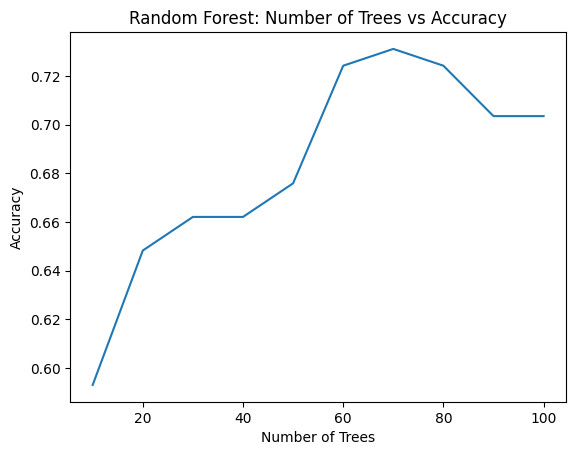

In [12]:
accuracies = []
n_trees = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(x_train.reshape(x_train.shape[0], -1), y_train)
    y_pred = rf.predict(x_test.reshape(x_test.shape[0], -1))
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print("n_estimators: {}, accuracy: {}".format(n, accuracy))

plt.plot(n_trees, accuracies)
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest: Number of Trees vs Accuracy')
plt.show()

# Single prediction

Predicted label: normal


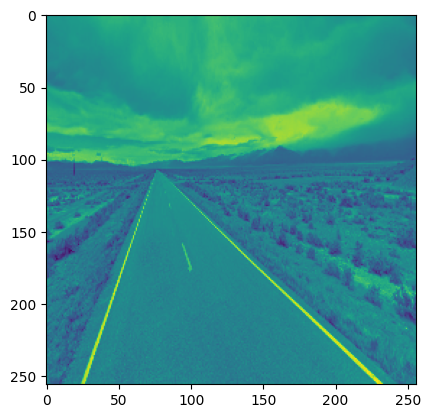

In [21]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('sample2/img.jpg')

# Preprocess the image
img_size = 256
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (img_size, img_size))
input_data = np.array(resized).reshape(1, -1) / 255.0

# Make prediction
prediction = rf.predict(input_data)

# Decode the prediction
categories = ['normal', 'patholes']
predicted_label = categories[np.argmax(prediction)]
plt.imshow(np.squeeze(resized))
print('Predicted label:', predicted_label)
